# <center> Time Series Forecasting <center>

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

In [2]:
sales = pd.read_csv('Tractor-Sales.csv')

In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Month-Year              144 non-null    object
 1   Number of Tractor Sold  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
sales

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203
...,...,...
139,Aug-14,848
140,Sep-14,640
141,Oct-14,581
142,Nov-14,519


In [6]:
sales.columns = ['Month_Year', 'No_Tractors_Sold']

In [7]:
sales['Month_Year'] = pd.to_datetime(sales.Month_Year)

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1-01-03 00:00:00

In [8]:
sales['Month_Year'] = pd.to_datetime(sales.Month_Year, format='%b-%y')

In [10]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Month_Year        144 non-null    datetime64[ns]
 1   No_Tractors_Sold  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [11]:
sales.set_index(sales.Month_Year, inplace=True)

In [12]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 2003-01-01 to 2014-12-01
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Month_Year        144 non-null    datetime64[ns]
 1   No_Tractors_Sold  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.4 KB


In [13]:
sales

,Month_Year,No_Tractors_Sold
Month_Year,,
2003-01-01,2003-01-01,141
2003-02-01,2003-02-01,157
2003-03-01,2003-03-01,185
2003-04-01,2003-04-01,199
2003-05-01,2003-05-01,203
...,...,...
2014-08-01,2014-08-01,848
2014-09-01,2014-09-01,640
2014-10-01,2014-10-01,581


In [14]:
sales['year'] = sales.Month_Year.dt.year
sales['month'] = sales.Month_Year.dt.month

In [15]:
sales.head()

,Month_Year,No_Tractors_Sold,year,month
Month_Year,,,,
2003-01-01,2003-01-01,141,2003,1
2003-02-01,2003-02-01,157,2003,2
2003-03-01,2003-03-01,185,2003,3
2003-04-01,2003-04-01,199,2003,4
2003-05-01,2003-05-01,203,2003,5


In [16]:
ts = sales.No_Tractors_Sold

In [18]:
ts

Month_Year
2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Name: No_Tractors_Sold, Length: 144, dtype: int64

In [19]:
type(ts)

pandas.core.series.Series

<AxesSubplot:xlabel='Month_Year'>

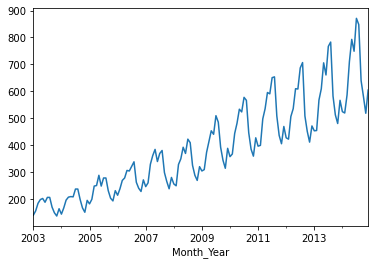

In [20]:
ts.plot()

In [21]:
pd.pivot_table(data = sales, index = 'year', columns = 'month', values = 'No_Tractors_Sold')

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2003,141,157,185,199,203,189,207,207,171,150,138,165
2004,145,168,197,208,210,209,238,238,199,168,152,196
2005,183,200,249,251,289,249,279,279,232,204,194,232
2006,215,239,270,279,307,305,322,339,263,241,229,272
2007,247,261,330,362,385,340,370,381,299,266,239,281
2008,257,250,329,350,393,370,423,410,326,289,270,321
2009,305,310,374,414,454,441,510,486,393,345,315,389
2010,358,368,444,482,534,524,578,567,447,386,360,428
2011,397,400,498,536,596,591,651,654,509,437,406,470


<AxesSubplot:xlabel='year'>

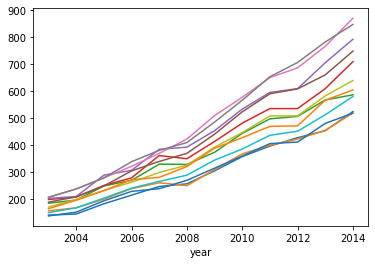

In [22]:
#Long to wide data
pd.pivot_table(data = sales, index = 'year', columns = 'month', values = 'No_Tractors_Sold').plot(legend=False)

In [23]:
pd.pivot_table(data = sales, index = 'month', columns = 'year', values = 'No_Tractors_Sold')

year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
month,,,,,,,,,,,,
1,141,145,183,215,247,257,305,358,397,428,454,525
2,157,168,200,239,261,250,310,368,400,423,455,520
3,185,197,249,270,330,329,374,444,498,507,568,587
4,199,208,251,279,362,350,414,482,536,536,610,710
5,203,210,289,307,385,393,454,534,596,610,706,793
6,189,209,249,305,340,370,441,524,591,609,661,749
7,207,238,279,322,370,423,510,578,651,687,767,871
8,207,238,279,339,381,410,486,567,654,707,783,848
9,171,199,232,263,299,326,393,447,509,509,583,640


<AxesSubplot:xlabel='month'>

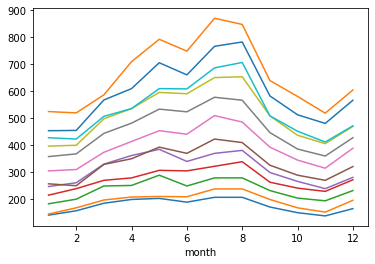

In [24]:
pd.pivot_table(data = sales, index = 'month', columns = 'year', values = 'No_Tractors_Sold').plot(legend=False)

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
seasonal_decompose?

In [36]:
# decom = seasonal_decompose(ts, model='multiplicative')
decom = seasonal_decompose(ts, model='additive')

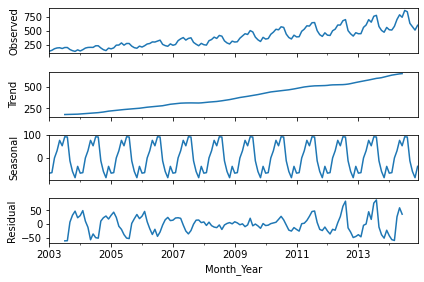

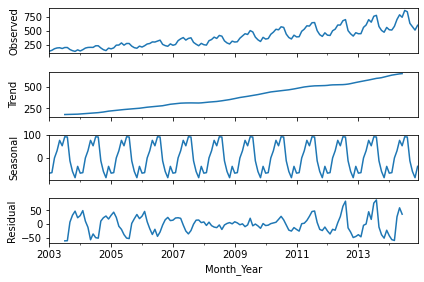

In [37]:
decom.plot()

In [38]:
decom.seasonal.head(15)

Month_Year
2003-01-01   -68.763889
2003-02-01   -66.434343
2003-03-01    -1.638889
2003-04-01    29.952020
2003-05-01    75.876263
2003-06-01    51.948232
2003-07-01    91.584596
2003-08-01    90.482323
2003-09-01   -14.233586
2003-10-01   -61.328283
2003-11-01   -88.680556
2003-12-01   -38.763889
2004-01-01   -68.763889
2004-02-01   -66.434343
2004-03-01    -1.638889
Name: No_Tractors_Sold, dtype: float64

In [39]:
decomposed = pd.concat([decom.observed, decom.trend, decom.seasonal, decom.resid], axis=1).head(24)
decomposed.columns = ['Actual', 'Trend', 'Seasonality', 'Irregular']
decomposed

,Actual,Trend,Seasonality,Irregular
Month_Year,,,,
2003-01-01,141,NaN,-68.763889,NaN
2003-02-01,157,NaN,-66.434343,NaN
2003-03-01,185,NaN,-1.638889,NaN
2003-04-01,199,NaN,29.952020,NaN
2003-05-01,203,NaN,75.876263,NaN
2003-06-01,189,NaN,51.948232,NaN
2003-07-01,207,176.166667,91.584596,-60.751263
2003-08-01,207,176.791667,90.482323,-60.273990
2003-09-01,171,177.750000,-14.233586,7.483586


In [35]:
176.166667*1.236024*0.950648

207.00001654741857

In [41]:
176.166667+91.584596-60.751263

207.0

If both Trend and Seasonality are present in the data - Use Multiplicative

Either trend or seasonality - Use Additive ( can use Multiplicative as well )

-------

Use stldecompose if you want to predict values for future months as well

### STL - Seasonality Trend Loess (Locally Estimated Regression)

In [42]:
from stldecompose import decompose, forecast

In [48]:
decompose?

In [43]:
from stldecompose.forecast_funcs import naive, drift, mean

In [44]:
decom = decompose(ts)

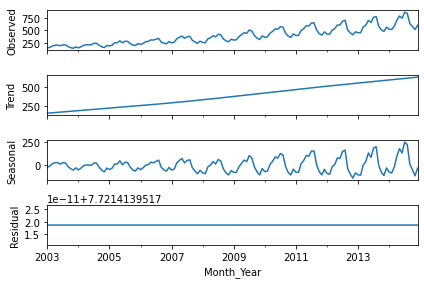

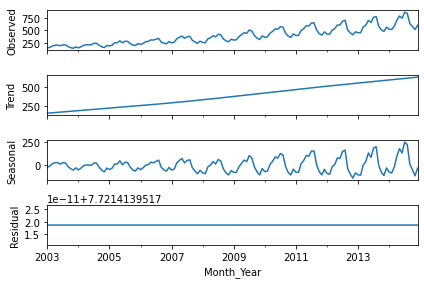

In [45]:
decom.plot()

In [46]:
stl_decom_values = pd.concat([decom.observed, decom.trend, decom.seasonal, decom.resid], axis=1).head(24)

In [47]:
stl_decom_values.columns = ['Actual', 'Trend', 'Seasonality', 'Irregular']
stl_decom_values

,Actual,Trend,Seasonality,Irregular
Month_Year,,,,
2003-01-01,141,155.580044,-22.301458,7.721414
2003-02-01,157,158.350693,-9.072107,7.721414
2003-03-01,185,161.125147,16.153439,7.721414
2003-04-01,199,163.903526,27.375060,7.721414
2003-05-01,203,166.685867,28.592719,7.721414
2003-06-01,189,169.472079,11.806507,7.721414
2003-07-01,207,172.261943,27.016643,7.721414
2003-08-01,207,175.055143,24.223444,7.721414
2003-09-01,171,177.851233,-14.572647,7.721414


### Train Test Split

In [49]:
sales.No_Tractors_Sold

Month_Year
2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Name: No_Tractors_Sold, Length: 144, dtype: int64

In [ ]:
df[:10]

In [50]:
train = sales.No_Tractors_Sold[:'2014-06-01']
train

Month_Year
2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-02-01    520
2014-03-01    587
2014-04-01    710
2014-05-01    793
2014-06-01    749
Name: No_Tractors_Sold, Length: 138, dtype: int64

In [51]:
test = sales.No_Tractors_Sold['2014-07-01':]
test

Month_Year
2014-07-01    871
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Name: No_Tractors_Sold, dtype: int64

### Forecasting using STL Forecast()

In [52]:
decom_train = decompose(train, period = 12)

In [53]:
decom_train.observed

Month_Year
2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-02-01    520
2014-03-01    587
2014-04-01    710
2014-05-01    793
2014-06-01    749
Name: No_Tractors_Sold, Length: 138, dtype: int64

In [54]:
forecast(decom_train, steps = 6, fc_func = drift, seasonal = True)

,drift+seasonal
2014-07-02,716.038863
2014-08-02,718.125634
2014-09-02,616.651714
2014-10-03,573.352222
2014-11-03,550.506493
2014-12-04,605.119672


In [55]:
fcast_6m = forecast(decom_train, steps = 6, fc_func = drift, seasonal = True)   #Algorithm

In [56]:
fcast_6m.columns = ['fcast']

In [57]:
fcast_6m

,fcast
2014-07-02,716.038863
2014-08-02,718.125634
2014-09-02,616.651714
2014-10-03,573.352222
2014-11-03,550.506493
2014-12-04,605.119672


In [58]:
test

Month_Year
2014-07-01    871
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Name: No_Tractors_Sold, dtype: int64

In [59]:
pd.DataFrame(test).reset_index()

,Month_Year,No_Tractors_Sold
0,2014-07-01,871
1,2014-08-01,848
2,2014-09-01,640
3,2014-10-01,581
4,2014-11-01,519
5,2014-12-01,605


In [60]:
pd.DataFrame(fcast_6m.values)

,0
0,716.038863
1,718.125634
2,616.651714
3,573.352222
4,550.506493
5,605.119672


In [61]:
fcast_test = pd.concat([pd.DataFrame(test).reset_index(),pd.DataFrame(fcast_6m.values)], axis = 1)

In [62]:
fcast_test.set_index(fcast_test.Month_Year, inplace=True)

In [63]:
fcast_test.drop('Month_Year', axis = 1, inplace = True)

In [64]:
fcast_test.columns = ['Actual', 'Forecast']

In [65]:
fcast_test

,Actual,Forecast
Month_Year,,
2014-07-01,871,716.038863
2014-08-01,848,718.125634
2014-09-01,640,616.651714
2014-10-01,581,573.352222
2014-11-01,519,550.506493
2014-12-01,605,605.119672


In [66]:
fcast_test['Diff'] = np.abs(fcast_test.Actual - fcast_test.Forecast)

In [67]:
fcast_test['APE'] = np.abs(fcast_test.Actual - fcast_test.Forecast)/fcast_test.Actual

In [68]:
fcast_test

,Actual,Forecast,Diff,APE
Month_Year,,,,
2014-07-01,871,716.038863,154.961137,0.177912
2014-08-01,848,718.125634,129.874366,0.153154
2014-09-01,640,616.651714,23.348286,0.036482
2014-10-01,581,573.352222,7.647778,0.013163
2014-11-01,519,550.506493,31.506493,0.060706
2014-12-01,605,605.119672,0.119672,0.000198


In [69]:
np.mean(fcast_test['APE'])

0.07360237860400766

In [76]:
train

Month_Year
2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-02-01    520
2014-03-01    587
2014-04-01    710
2014-05-01    793
2014-06-01    749
Name: No_Tractors_Sold, Length: 138, dtype: int64

In [78]:
np.mean(np.abs(train - (decom_train.trend + decom_train.seasonal )) / train)

0.0812949518590898

In [ ]:
MAPE - Train